In [1]:
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder, get_geocoders
from arcgis import features
from IPython.display import display
from getpass import getpass
import pandas as pd
from copy import deepcopy


In [2]:
password = getpass()
gis = GIS("https://gisp.usps.gov/portal", "FJ7DF0", password)

········


# Below - Routes f_layer

<Item title:"AdvMailRoutesH" type:Feature Layer Collection owner:FJ7DF0>
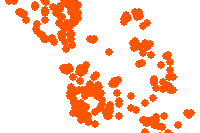

In [3]:
search_results = gis.content.search('title: AdvMailRoutesH',item_type='Feature Layer')

# Access the first Item that's returned
route_layer = search_results[0]


route_layer



In [4]:
routes_layer = route_layer.layers
routes_flayer = routes_layer[0]
routes_fset = routes_flayer.query()#querying without any 
                                   # conditions returns all the features.
routes_fset.df.head()

,address,city,objectid,route_id,zip,SHAPE
0,10401 SANTA MONICA BLVD STE 1,Los Angeles,1,90025C009,90025,"{'x': -13182930.806099992, 'y': 4036524.996000..."
1,1898 WESTWOOD BLVD,Los Angeles,2,90025C017,90025,"{'x': -13184178.828200005, 'y': 4035290.657400..."
2,1990 WESTWOOD BLVD STE 120,Los Angeles,3,90025C018,90025,"{'x': -13184042.777199995, 'y': 4035100.556500..."
3,10780 SANTA MONICA BLVD STE 206,Los Angeles,4,90025C041,90025,"{'x': -13184015.0959, 'y': 4035572.9080000073}"
4,8703 W OLYMPIC BLVD,Los Angeles,5,90035C014,90035,"{'x': -13178175.852500003, 'y': 4036779.358699..."


In [5]:
routes_fset.df.shape


(262, 6)

# Below - daily scans from csv excel

In [6]:
#Book page 243
import pandas as pd
dataFrame = pd.read_csv("C:\\Users\\FJ7DF0\\Desktop\\Weeks_Scans\\aug 29 2018.csv", encoding = "ISO-8859-1")
dataFrame

,Track_Nmbr,MDD_SerNbr,ZIP_Code,SOM,Col_Bx_ID,BoxAddress,Office,route_id,NoScanDate
0,9114 9014 9645 1300 1809 50,15092D8408,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C001,8/29/2018
1,9114 9014 9645 1300 1809 50,15087D8702,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C004,8/29/2018
2,9114 9014 9645 1300 1809 50,15237D81F1,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C032,8/29/2018
3,9114 9014 9645 1300 1809 50,14225D877B,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C022,8/29/2018
4,9114 9999 4431 3526 4253 85,15157D866C,90024,MCSO 3,9004900054,2323 ROSCOMARE RD,BARRINGTON,90049C006,8/29/2018
5,9114 9999 4431 3526 4254 08,14216D81EE,90024,MCSO 3,9004900010,815 MORAGA DR,BARRINGTON,90049C031,8/29/2018
6,9114 9999 4431 3526 4254 08,14203D82D3,90024,MCSO 3,9004900010,815 MORAGA DR,BARRINGTON,90049C041,8/29/2018
7,9114 9999 4431 3526 4254 08,14319D80FF,90024,MCSO 3,9004900010,815 MORAGA DR,BARRINGTON,90049C017,8/29/2018
8,9114 9999 4431 3526 4254 22,14220D827E,90024,MCSO 3,9004900033,1727 MANDEVILLE CANYON RD,BARRINGTON,90049C014,8/29/2018
9,9114 9999 4431 3526 4254 60,15101D855F,90024,MCSO 3,9004900034,939 S WESTGATE AVE,BARRINGTON,90049C069,8/29/2018


In [7]:
csv1 = "C:\\Users\\FJ7DF0\\Desktop\\Weeks_Scans\\aug 29 2018.csv"

scans_df_1 = pd.read_csv(csv1)
scans_df_1.head()


,Track_Nmbr,MDD_SerNbr,ZIP_Code,SOM,Col_Bx_ID,BoxAddress,Office,route_id,NoScanDate
0,9114 9014 9645 1300 1809 50,15092D8408,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C001,8/29/2018
1,9114 9014 9645 1300 1809 50,15087D8702,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C004,8/29/2018
2,9114 9014 9645 1300 1809 50,15237D81F1,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C032,8/29/2018
3,9114 9014 9645 1300 1809 50,14225D877B,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C022,8/29/2018
4,9114 9999 4431 3526 4253 85,15157D866C,90024,MCSO 3,9004900054,2323 ROSCOMARE RD,BARRINGTON,90049C006,8/29/2018


In [8]:
#get the dimensions of this csv
scans_df_1.shape

(183, 9)

# Below - Routes f_layer joined to Daily Scans file

<Item title:"AdvMailRouteWithScans" type:Feature Layer Collection owner:FJ7DF0>
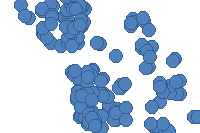

In [9]:
search_results = gis.content.search('title: AdvMailRouteWithScans',item_type='Feature Layer')
  
   # Access the first Item that's returned
RouteScansJoined = search_results[0]

RouteScansJoined

In [10]:
RouteScan_layer = RouteScansJoined.layers
RteScan_flayer = RouteScan_layer[0]
RteScan_fset = RteScan_flayer.query()
#querying without any conditions, returns all the features.
RteScan_fset.df.head()


,address,boxaddress,city,col_bx_id,mdd_sernbr,noscandate,objectid,office,route_id,som,track_nmbr,zip,zip_code,SHAPE
0,1898 WESTWOOD BLVD,10780 SANTA MONICA BLVD,Los Angeles,9002500056,14206D857A,1531810800000,1,WEST LOS ANGELES,90025C017,MCSO 3,9114 9014 9645 1305 2209 72,90025,90025,"{'x': -13184178.828200005, 'y': 4035290.657400..."
1,10780 SANTA MONICA BLVD STE 206,10780 SANTA MONICA BLVD,Los Angeles,9002500056,15173D8292,1531810800000,2,WEST LOS ANGELES,90025C041,MCSO 3,9114 9014 9645 1305 2209 72,90025,90025,"{'x': -13184015.0959, 'y': 4035572.9080000073}"
2,3605 W 59TH PL,4411 W SLAUSON AVE,Los Angeles,9004300031,15206D81AA,1531810800000,3,JULIAN DIXON STA,90043C053,MCSO 5,9114 9999 4431 3915 0479 90,90043,90043,"{'x': -13173038.104399994, 'y': 4026959.996900..."
3,8601 S VERMONT AVE,1323 W 82ND ST,Los Angeles,9004400024,14223D812C,1531810800000,4,HANCOCK STA,90044C024,MCSO 5,9114 9014 9645 0037 9770 17,90044,90044,"{'x': -13168190.0862, 'y': 4023413.9091000184}"
4,10650 ASHBY AVE,10573 PICO BLVD,Los Angeles,9006400127,14206D86E1,1531810800000,5,RANCHO PARK STA,90064C013,MCSO 3,9114 9014 9645 1305 2209 89,90064,90064,"{'x': -13182565.776699994, 'y': 4033983.982300..."


In [11]:
#read new daily scan csv2 
csv2 = "C:\\Users\\FJ7DF0\\Desktop\\Weeks_Scans\\aug 30 2018.csv"

scans_df_2 = pd.read_csv(csv2)
scans_df_2.head()


,Track_Nmbr,MDD_SerNbr,ZIP_Code,SOM,Col_Bx_ID,BoxAddress,Office,route_id,NoScanDate
0,9114 9014 9645 1300 1809 50,15092D8408,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C001,8/30/2018
1,9114 9014 9645 1300 1809 50,15087D8702,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C004,8/30/2018
2,9114 9014 9645 1300 1809 50,15237D81F1,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C032,8/30/2018
3,9114 9014 9645 1300 1809 50,14225D877B,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C022,8/30/2018
4,9114 9999 4431 3526 4253 85,15157D866C,90024,MCSO 3,9004900054,2323 ROSCOMARE RD,BARRINGTON,90049C006,8/30/2018


In [12]:
#Book page 243
import pandas as pd
dataFrame = pd.read_csv("C:\\Users\\FJ7DF0\\Desktop\\Weeks_Scans\\aug 30 2018.csv", encoding = "ISO-8859-1")
dataFrame

,Track_Nmbr,MDD_SerNbr,ZIP_Code,SOM,Col_Bx_ID,BoxAddress,Office,route_id,NoScanDate
0,9114 9014 9645 1300 1809 50,15092D8408,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C001,8/30/2018
1,9114 9014 9645 1300 1809 50,15087D8702,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C004,8/30/2018
2,9114 9014 9645 1300 1809 50,15237D81F1,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C032,8/30/2018
3,9114 9014 9645 1300 1809 50,14225D877B,90021,MCSO 2,Finance Unit,1122 E. 7th Street,ALAMEDA STA,90021C022,8/30/2018
4,9114 9999 4431 3526 4253 85,15157D866C,90024,MCSO 3,9004900054,2323 ROSCOMARE RD,BARRINGTON,90049C006,8/30/2018
5,9114 9999 4431 3526 4254 08,14216D81EE,90024,MCSO 3,9004900010,815 MORAGA DR,BARRINGTON,90049C031,8/30/2018
6,9114 9999 4431 3526 4254 08,14203D82D3,90024,MCSO 3,9004900010,815 MORAGA DR,BARRINGTON,90049C041,8/30/2018
7,9114 9999 4431 3526 4254 08,14319D80FF,90024,MCSO 3,9004900010,815 MORAGA DR,BARRINGTON,90049C017,8/30/2018
8,9114 9999 4431 3526 4254 22,14220D8299,90024,MCSO 3,9004900033,1727 MANDEVILLE CANYON RD,BARRINGTON,90049C007,8/30/2018
9,9114 9999 4431 3526 4254 22,14220D827E,90024,MCSO 3,9004900033,1727 MANDEVILLE CANYON RD,BARRINGTON,90049C014,8/30/2018


In [13]:
#get the dimensions of this csv
scans_df_2.shape


(185, 9)

# Below - Identifying existing features that need to be updated


In [14]:
#cities_flayer = cities_item.layers[0]
#cities_fset = cities_flayer.query() #querying without any conditions returns all the features
#cities_fset.df.head()

updated_flayer = RouteScansJoined.layers[0]
updated_fset = updated_flayer.query()  #querying without any conditions returns all the features
updated_fset.df.head()



,address,boxaddress,city,col_bx_id,mdd_sernbr,noscandate,objectid,office,route_id,som,track_nmbr,zip,zip_code,SHAPE
0,1898 WESTWOOD BLVD,10780 SANTA MONICA BLVD,Los Angeles,9002500056,14206D857A,1531810800000,1,WEST LOS ANGELES,90025C017,MCSO 3,9114 9014 9645 1305 2209 72,90025,90025,"{'x': -13184178.828200005, 'y': 4035290.657400..."
1,10780 SANTA MONICA BLVD STE 206,10780 SANTA MONICA BLVD,Los Angeles,9002500056,15173D8292,1531810800000,2,WEST LOS ANGELES,90025C041,MCSO 3,9114 9014 9645 1305 2209 72,90025,90025,"{'x': -13184015.0959, 'y': 4035572.9080000073}"
2,3605 W 59TH PL,4411 W SLAUSON AVE,Los Angeles,9004300031,15206D81AA,1531810800000,3,JULIAN DIXON STA,90043C053,MCSO 5,9114 9999 4431 3915 0479 90,90043,90043,"{'x': -13173038.104399994, 'y': 4026959.996900..."
3,8601 S VERMONT AVE,1323 W 82ND ST,Los Angeles,9004400024,14223D812C,1531810800000,4,HANCOCK STA,90044C024,MCSO 5,9114 9014 9645 0037 9770 17,90044,90044,"{'x': -13168190.0862, 'y': 4023413.9091000184}"
4,10650 ASHBY AVE,10573 PICO BLVD,Los Angeles,9006400127,14206D86E1,1531810800000,5,RANCHO PARK STA,90064C013,MCSO 3,9114 9014 9645 1305 2209 89,90064,90064,"{'x': -13182565.776699994, 'y': 4033983.982300..."


In [15]:
updated_fset.df.shape


(178, 14)

In [16]:
#overlap_rows = pd.merge(left = cities_fset.df, right = cities_df_2, how='inner',
#                       on = 'city_id')
#overlap_rows

overlap_rows = pd.merge(left = updated_fset.df, right = scans_df_2, how='inner', on = 'route_id')
overlap_rows



,address,boxaddress,city,col_bx_id,mdd_sernbr,noscandate,objectid,office,route_id,som,...,zip_code,SHAPE,Track_Nmbr,MDD_SerNbr,ZIP_Code,SOM,Col_Bx_ID,BoxAddress,Office,NoScanDate
0,1898 WESTWOOD BLVD,10780 SANTA MONICA BLVD,Los Angeles,9002500056,14206D857A,1531810800000,1,WEST LOS ANGELES,90025C017,MCSO 3,...,90025,"{'x': -13184178.828200005, 'y': 4035290.657400...",9114 9014 9645 1305 2209 72,14206D857A,90025,MCSO 3,9002500056,10780 SANTA MONICA BLVD,WEST LOS ANGELES,8/30/2018
1,3605 W 59TH PL,4411 W SLAUSON AVE,Los Angeles,9004300031,15206D81AA,1531810800000,3,JULIAN DIXON STA,90043C053,MCSO 5,...,90043,"{'x': -13173038.104399994, 'y': 4026959.996900...",9114 9999 4431 3915 0479 90,15206D81AA,90043,MCSO 5,9004300031,4411 W SLAUSON AVE,JULIAN DIXON STA,8/30/2018
2,10650 ASHBY AVE,10573 PICO BLVD,Los Angeles,9006400127,14206D86E1,1531810800000,5,RANCHO PARK STA,90064C013,MCSO 3,...,90064,"{'x': -13182565.776699994, 'y': 4033983.982300...",9114 9014 9645 1305 2209 89,14206D86E1,90064,MCSO 3,9006400127,10573 PICO BLVD,RANCHO PARK STA,8/30/2018
3,401 SHELDON ST,512 CENTER ST,El Segundo,9024500020,14228D8241,1531810800000,8,MANHATTAN BEACH PO,90245C015,MPOO A,...,90245,"{'x': -13181483.643699996, 'y': 4018351.290500...",9114 9011 8986 6152 7206 75,14228D8241,90245,MPOO A,9024500020,512 CENTER ST,MANHATTAN BEACH PO,8/30/2018
4,1017 EL SEGUNDO BLVD,1415 E GRAND AVE,El Segundo,9024500027,14220D8076,1531810800000,9,MANHATTAN BEACH PO,90245C016,MPOO A,...,90245,"{'x': -13180845.803199999, 'y': 4017583.316500...",9114 9011 8986 6152 7206 99,14220D8076,90245,MPOO A,9024500027,1415 E GRAND AVE,MANHATTAN BEACH PO,8/30/2018
5,4442 W 117TH ST APT A,11873 HAWTHORNE BLVD,Hawthorne,9025000032,14226D83BB,1531810800000,10,HAWTHORNE PO,90250C009,MPOO A,...,90250,"{'x': -13175065.6166, 'y': 4019164.6624000147}",9114 9011 8986 6152 7207 05,14226D83BB,90250,MPOO A,9025000032,11873 HAWTHORNE BLVD,HAWTHORNE PO,8/30/2018
6,13034 HINDRY AVE,5348 W 135TH ST,Hawthorne,9025000098,14218D83E4,1531810800000,11,HAWTHORNE PO,90250C031,MPOO A,...,90250,"{'x': -13177146.047700003, 'y': 4017271.849900...",9114 9011 8986 6152 7206 68,14218D83E4,90250,MPOO A,9025000098,5348 W 135TH ST,HAWTHORNE PO,8/30/2018
7,11901 RAMONA AVE,11873 HAWTHORNE BLVD,Hawthorne,9025000032,14226D83BB,1531810800000,12,HAWTHORNE PO,90250C035,MPOO A,...,90250,"{'x': -13175442.028300002, 'y': 4018800.237300...",9114 9011 8986 6152 7207 05,14226D83BB,90250,MPOO A,9025000032,11873 HAWTHORNE BLVD,HAWTHORNE PO,8/30/2018
8,3119 W 139TH ST STEA,3103 W ROSECRANS AVE,Hawthorne,9025000082,15196D8388,1531810800000,13,HAWTHORNE PO,90250C042,MPOO A,...,90250,"{'x': -13172098.931899998, 'y': 4016130.693900...",9114 9011 8986 6152 7206 37,15196D8388,90250,MPOO A,9025000082,3103 W ROSECRANS AVE,HAWTHORNE PO,8/30/2018
9,4701 W EL SEGUNDO BLVD,5402 W 122ND ST,Hawthorne,9025000077,14206D82D4,1531810800000,14,HAWTHORNE PO,90250C051,MPOO A,...,90250,"{'x': -13175690.0557, 'y': 4017588.6629000083}",9114 9011 8986 6152 7206 51,14206D82D4,90250,MPOO A,9025000077,5402 W 122ND ST,HAWTHORNE PO,8/30/2018


In [17]:
scans_df_2.shape

(185, 9)

# Below - Perform updates to the existing features



In [18]:
#features_for_update = [] #list containing corrected features
#all_features = cities_fset.features

features_for_update = []  #list containing corrected features
all_features = updated_fset.features

updated_fset.df.head()


,address,boxaddress,city,col_bx_id,mdd_sernbr,noscandate,objectid,office,route_id,som,track_nmbr,zip,zip_code,SHAPE
0,1898 WESTWOOD BLVD,10780 SANTA MONICA BLVD,Los Angeles,9002500056,14206D857A,1531810800000,1,WEST LOS ANGELES,90025C017,MCSO 3,9114 9014 9645 1305 2209 72,90025,90025,"{'x': -13184178.828200005, 'y': 4035290.657400..."
1,10780 SANTA MONICA BLVD STE 206,10780 SANTA MONICA BLVD,Los Angeles,9002500056,15173D8292,1531810800000,2,WEST LOS ANGELES,90025C041,MCSO 3,9114 9014 9645 1305 2209 72,90025,90025,"{'x': -13184015.0959, 'y': 4035572.9080000073}"
2,3605 W 59TH PL,4411 W SLAUSON AVE,Los Angeles,9004300031,15206D81AA,1531810800000,3,JULIAN DIXON STA,90043C053,MCSO 5,9114 9999 4431 3915 0479 90,90043,90043,"{'x': -13173038.104399994, 'y': 4026959.996900..."
3,8601 S VERMONT AVE,1323 W 82ND ST,Los Angeles,9004400024,14223D812C,1531810800000,4,HANCOCK STA,90044C024,MCSO 5,9114 9014 9645 0037 9770 17,90044,90044,"{'x': -13168190.0862, 'y': 4023413.9091000184}"
4,10650 ASHBY AVE,10573 PICO BLVD,Los Angeles,9006400127,14206D86E1,1531810800000,5,RANCHO PARK STA,90064C013,MCSO 3,9114 9014 9645 1305 2209 89,90064,90064,"{'x': -13182565.776699994, 'y': 4033983.982300..."


In [19]:
updated_fset.df.shape


(178, 14)

In [20]:
#inspect one of the features
all_features[0]

{"geometry": {"x": -13184178.828200005, "y": 4035290.6574000046}, "attributes": {"objectid": 1, "route_id": "90025C017", "address": "1898 WESTWOOD BLVD", "city": "Los Angeles", "zip": 90025, "track_nmbr": "9114 9014 9645 1305 2209 72", "mdd_sernbr": "14206D857A", "zip_code": 90025, "som": "MCSO 3", "col_bx_id": "9002500056", "boxaddress": "10780 SANTA MONICA BLVD", "office": "WEST LOS ANGELES", "noscandate": 1531810800000}}

# Below - Identifying new features that need to be added

# Below - Inspecting existing fields of the feature layer

In [21]:
update_features = []

    #  get the matching row from csv
for route_id in overlap_rows['route_id']:
    
    #  get the feature to be updated  
    original_feature = [f for f in all_features if f.attributes['route_id'] == route_id][0]
    feature_to_be_updated = deepcopy(original_feature)
    
    print(str(original_feature))
    
    #  get the matching row from csv
    matching_row = scans_df_2.where(scans_df_2.route_id == route_id).dropna()
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print (matching_row)
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    
    #  assign the updated values  #Problem here
    feature_to_be_updated.attributes['NoScanDate'] = matching_row['NoScanDate'].values[0]
    #feature_to_be_updated.attributes['capital'] = matching_row['capital'].values[0]
    
    
    
    #  add this to the list of features to be updated
    features_for_update.append(feature_to_be_updated)

    print(str(feature_to_be_updated))
    print("=====================================================================================")
    
    

{"geometry": {"x": -13184178.828200005, "y": 4035290.6574000046}, "attributes": {"objectid": 1, "route_id": "90025C017", "address": "1898 WESTWOOD BLVD", "city": "Los Angeles", "zip": 90025, "track_nmbr": "9114 9014 9645 1305 2209 72", "mdd_sernbr": "14206D857A", "zip_code": 90025, "som": "MCSO 3", "col_bx_id": "9002500056", "boxaddress": "10780 SANTA MONICA BLVD", "office": "WEST LOS ANGELES", "noscandate": 1531810800000}}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                      Track_Nmbr  MDD_SerNbr  ZIP_Code     SOM   Col_Bx_ID  \
177  9114 9014 9645 1305 2209 72  14206D857A   90025.0  MCSO 3  9002500056   

                  BoxAddress            Office   route_id NoScanDate  
177  10780 SANTA MONICA BLVD  WEST LOS ANGELES  90025C017  8/30/2018  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
{"geometry": {"x": -13184178.828200005, "y": 4035290.6574000046}, "attributes": {"objectid": 1, "route_id":

{"geometry": {"x": -13197164.880800003, "y": 4038793.8531000167}, "attributes": {"objectid": 17, "route_id": "90272C026", "address": "1427 CHASTAIN PKWY W", "city": "Pacific Palisades", "zip": 90272, "track_nmbr": "9114 9011 8986 6152 7218 70", "mdd_sernbr": "15130D8034", "zip_code": 90272, "som": "MPOO A", "col_bx_id": "9027200006", "boxaddress": "1515 PALISADES DR", "office": "PACIFIC PALISADES PO", "noscandate": 1531810800000}}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                      Track_Nmbr  MDD_SerNbr  ZIP_Code     SOM   Col_Bx_ID  \
100  9114 9011 8986 6152 7218 70  15130D8034   90272.0  MPOO A  9027200006   

            BoxAddress                Office   route_id NoScanDate  
100  1515 PALISADES DR  PACIFIC PALISADES PO  90272C026  8/30/2018  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
{"geometry": {"x": -13197164.880800003, "y": 4038793.8531000167}, "attributes": {"objectid": 17, "route_

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                      Track_Nmbr  MDD_SerNbr  ZIP_Code     SOM   Col_Bx_ID  \
135  9114 9011 8986 6152 7218 56  15180D810E   90502.0  MPOO A  9050200045   

              BoxAddress       Office   route_id NoScanDate  
135  22416 S VERMONT AVE  TORRANCE PO  90502C005  8/30/2018  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
{"geometry": {"x": -13168924.736699998, "y": 4005257.486600004}, "attributes": {"objectid": 33, "route_id": "90502C005", "address": "1248 W 223RD ST", "city": "Torrance", "zip": 90502, "track_nmbr": "9114 9011 8986 6152 7218 56", "mdd_sernbr": "15180D810E", "zip_code": 90502, "som": "MPOO A", "col_bx_id": "9050200045", "boxaddress": "22416 S VERMONT AVE", "office": "TORRANCE PO", "noscandate": 1531810800000, "NoScanDate": "8/30/2018"}}
{"geometry": {"x": -13167858.577199997, "y": 4007188.589200005}, "attributes": {"objectid": 34, "route_id": "9050

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                     Track_Nmbr  MDD_SerNbr  ZIP_Code     SOM   Col_Bx_ID  \
17  9114 9011 8986 6152 7217 33  15198D80A0   90706.0  MPOO B  9070600027   

         BoxAddress         Office   route_id NoScanDate  
17  17011 CLARK AVE  BELLFLOWER PO  90706C012  8/30/2018  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
{"geometry": {"x": -13151577.383399997, "y": 4012105.9987000003}, "attributes": {"objectid": 56, "route_id": "90706C012", "address": "17223 LAKEWOOD BLVD", "city": "Bellflower", "zip": 90706, "track_nmbr": "9114 9011 8986 6152 7217 33", "mdd_sernbr": "15198D80A0", "zip_code": 90706, "som": "MPOO B", "col_bx_id": "9070600027", "boxaddress": "17011 CLARK AVE", "office": "BELLFLOWER PO", "noscandate": 1531810800000, "NoScanDate": "8/30/2018"}}
{"geometry": {"x": -13151572.789100002, "y": 4014019.129900016}, "attributes": {"objectid": 57, "route_id": "90706C0

{"geometry": {"x": -13159403.276000004, "y": 4034018.9832000136}, "attributes": {"objectid": 101, "route_id": "90033C035", "address": "501 S SOTO ST ", "city": "Los Angeles", "zip": 90033, "track_nmbr": "9117 9014 9645 1300 1808 44", "mdd_sernbr": "14216D8433", "zip_code": 90033, "som": "MCSO 2", "col_bx_id": "9003300013", "boxaddress": "215 N. Soto St.", "office": "BOYLE STA", "noscandate": 1531810800000, "NoScanDate": "8/30/2018"}}
{"geometry": {"x": -13159896.6655, "y": 4034895.1042000055}, "attributes": {"objectid": 102, "route_id": "90033C013", "address": "1942 E 2ND ST", "city": "Los Angeles", "zip": 90033, "track_nmbr": "9114 9014 9645 1300 1808 37", "mdd_sernbr": "14219D8486", "zip_code": 90033, "som": "MCSO 2", "col_bx_id": "9003300010", "boxaddress": "1700 E Cesar E Chavez Ave", "office": "BOYLE STA", "noscandate": 1531810800000}}
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                     Track_Nmbr  MDD_SerNbr  ZIP_Code     SOM   

# We have constructed a list of features with updated values. We can use this list to perform updates on the feature layer

In [ ]:
#features_for_update


In [ ]:
# To update the feature layer, call the edit_features() method of the FeatureLayer 
            #object and pass the list of features to the updates parameter

In [ ]:
cities_flayer.edit_features(updates= features_for_update)


# Identifying new features that need to be added

In [ ]:
#select those rows in the capitals_2.csv that do not overlap with those in capitals_1.csv
new_rows = cities_df_2[~cities_df_2['city_id'].isin(overlap_rows['city_id'])]
print(new_rows.shape)


In [ ]:
new_rows.head()

# Adding new features





In [ ]:
features_to_be_added = []

# get a template feature object
template_feature = deepcopy(features_for_update[0])

# loop through each row and add to the list of features to be added
for row in new_rows.iterrows():
    new_feature = deepcopy(template_feature)
    
    #print
    print("Creating " + row[1]['name'])
    
    #get geometries in the destination coordinate system
    input_geometry = {'y':float(row[1]['latitude']),
                       'x':float(row[1]['longitude'])}
    output_geometry = geometry.project(geometries = [input_geometry],
                                       in_sr = 4326, 
                                       out_sr = cities_fset.spatial_reference['latestWkid'],
                                      gis = gis)
    
    # assign the updated values
    new_feature.geometry = output_geometry[0]
    new_feature.attributes['longitude'] = float(row[1]['longitude'])
    new_feature.attributes['city_id'] = int(row[1]['city_id'])
    new_feature.attributes['state'] = row[1]['state']
    new_feature.attributes['capital'] = row[1]['capital']
    new_feature.attributes['latitude'] = float(row[1]['latitude'])
    new_feature.attributes['name'] = row[1]['name']
    new_feature.attributes['pop2000'] = int(row[1]['pop2000'])
    new_feature.attributes['pop2007'] = int(row[1]['pop2007'])
    
    #add this to the list of features to be updated
    features_to_be_added.append(new_feature)


In [ ]:
# take a look at one of the features we created
features_to_be_added[0]


In [ ]:
#add these new features to the feature layer, call the edit_features() method of the FeatureLayer object 
#and pass the list of Feature objects to the adds parameter

In [ ]:
cities_flayer.edit_features(adds = features_to_be_added)
